In [30]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models, applications, callbacks


from collections import Counter


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#!rm -rf /root/tensorflow_datasets/cassava

In [4]:
#(train_ds, val_ds, test_ds), ds_info = tfds.load(
   # 'cassava',
   # split=['train', 'validation', 'test'],  # Verify splits exist for this dataset
   # shuffle_files=True,
   # as_supervised=True,
   # with_info=True
#)

In [5]:
#!cp -r /root/tensorflow_datasets/cassava /content/drive/MyDrive/

In [6]:
dataset_path = '/content/drive/MyDrive/cassava'

In [7]:
(train_ds, val_ds, test_ds), ds_info = tfds.load(
    'cassava',
    data_dir=dataset_path,  # Specify the directory where the dataset is saved
    split=['train', 'validation', 'test'],  # Verify splits exist for this dataset
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)


In [8]:
class_names = ds_info.features['label'].names

In [9]:
print(f"Class names: {class_names}")

Class names: ['cbb', 'cbsd', 'cgm', 'cmd', 'healthy']


In [10]:
ds_info

tfds.core.DatasetInfo(
    name='cassava',
    full_name='cassava/0.1.0',
    description="""
    Cassava consists of leaf images for the cassava plant depicting healthy and
    four (4) disease conditions; Cassava Mosaic Disease (CMD), Cassava Bacterial
    Blight (CBB), Cassava Greem Mite (CGM) and Cassava Brown Streak Disease (CBSD).
    Dataset consists of a total of 9430 labelled images.
    The 9430 labelled images are split into a training set (5656), a test set(1885)
    and a validation set (1889). The number of images per class are unbalanced with
    the two disease classes CMD and CBSD having 72% of the images.
    """,
    homepage='https://www.kaggle.com/c/cassava-disease/overview',
    data_dir='/content/drive/MyDrive/cassava/cassava/0.1.0',
    file_format=tfrecord,
    download_size=1.26 GiB,
    dataset_size=1.26 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        

In [11]:
training_set = ds_info.splits['train']

print(f"Training samples: {training_set.num_examples} values")

Training samples: 5656 values


In [12]:
validation_set = ds_info.splits['validation']

print(f"Validation samples: {ds_info.splits['validation'].num_examples} values")

Validation samples: 1889 values


In [13]:
test_set = ds_info.splits['test']

print(f"Test samples: {ds_info.splits['test'].num_examples} values")

Test samples: 1885 values


In [14]:
training_set

<SplitInfo num_examples=5656, num_shards=8>

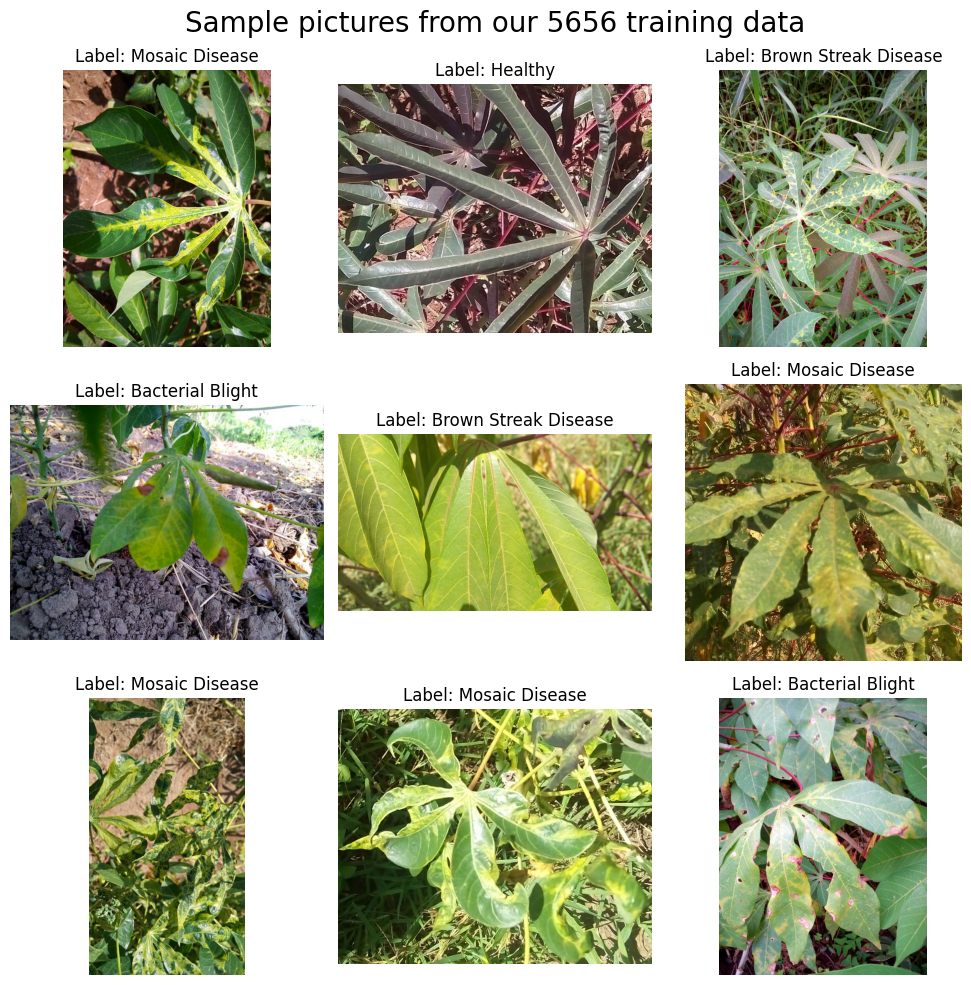

In [15]:
label_map = {
    0: 'Bacterial Blight',
    1: 'Brown Streak Disease',
    2: 'Green Mite',
    3: 'Mosaic Disease',
    4: 'Healthy',
    5: 'Unknown'
}

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    image = image.numpy()
    label = label.numpy()

    row, col = divmod(i, 3)
    ax = axes[row, col]

    ax.imshow(image)
    # Use the mapping to set the title with the disease name.
    ax.set_title(f"Label: {label_map[label]}")
    ax.axis("off")

fig.suptitle(f"Sample pictures from our {ds_info.splits['train'].num_examples} training data", fontsize=20)
plt.tight_layout()
plt.show()

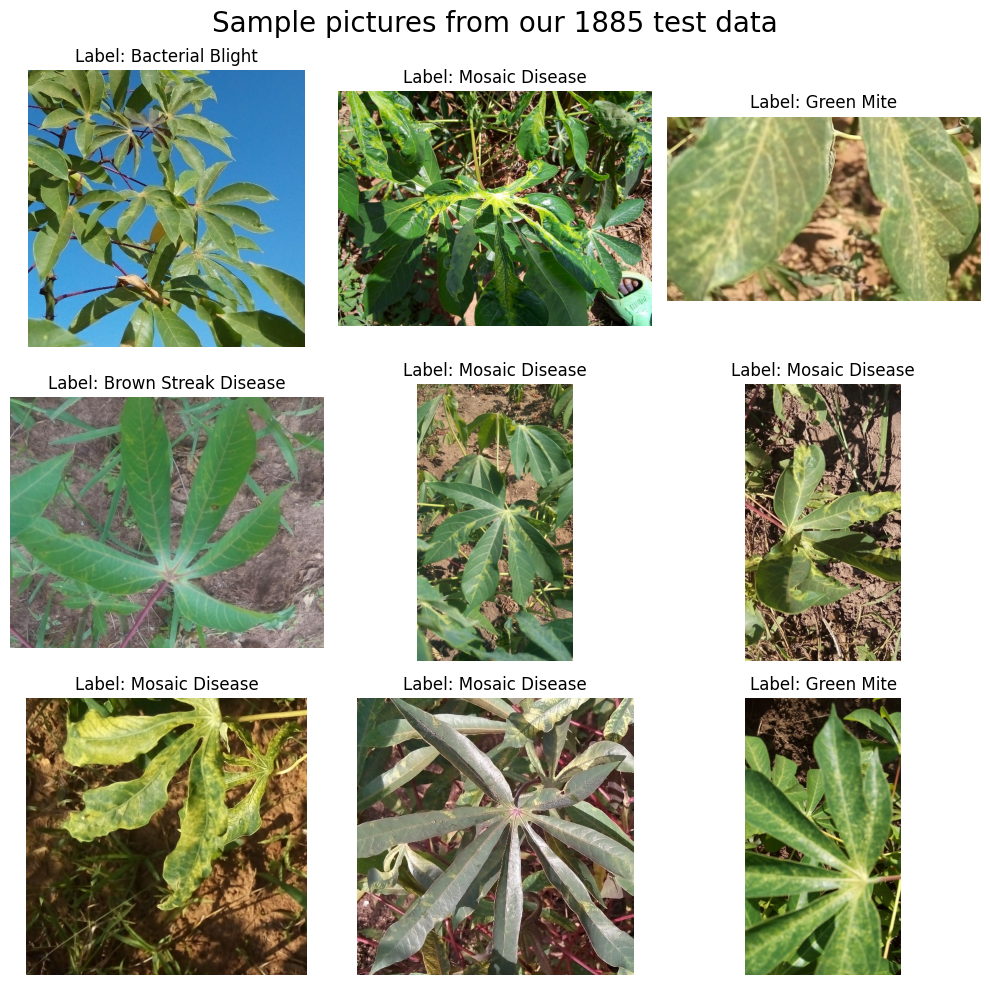

In [16]:
label_map = {
    0: 'Bacterial Blight',
    1: 'Brown Streak Disease',
    2: 'Green Mite',
    3: 'Mosaic Disease',
    4: 'Healthy',
    5: 'Unknown'
}

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, (image, label) in enumerate(test_ds.take(9)):
    image = image.numpy()
    label = label.numpy()

    row, col = divmod(i, 3)
    ax = axes[row, col]

    ax.imshow(image)
    # Use the mapping to set the title with the disease name.
    ax.set_title(f"Label: {label_map[label]}")
    ax.axis("off")

fig.suptitle(f"Sample pictures from our {ds_info.splits['test'].num_examples} test data", fontsize=20)
plt.tight_layout()
plt.show()

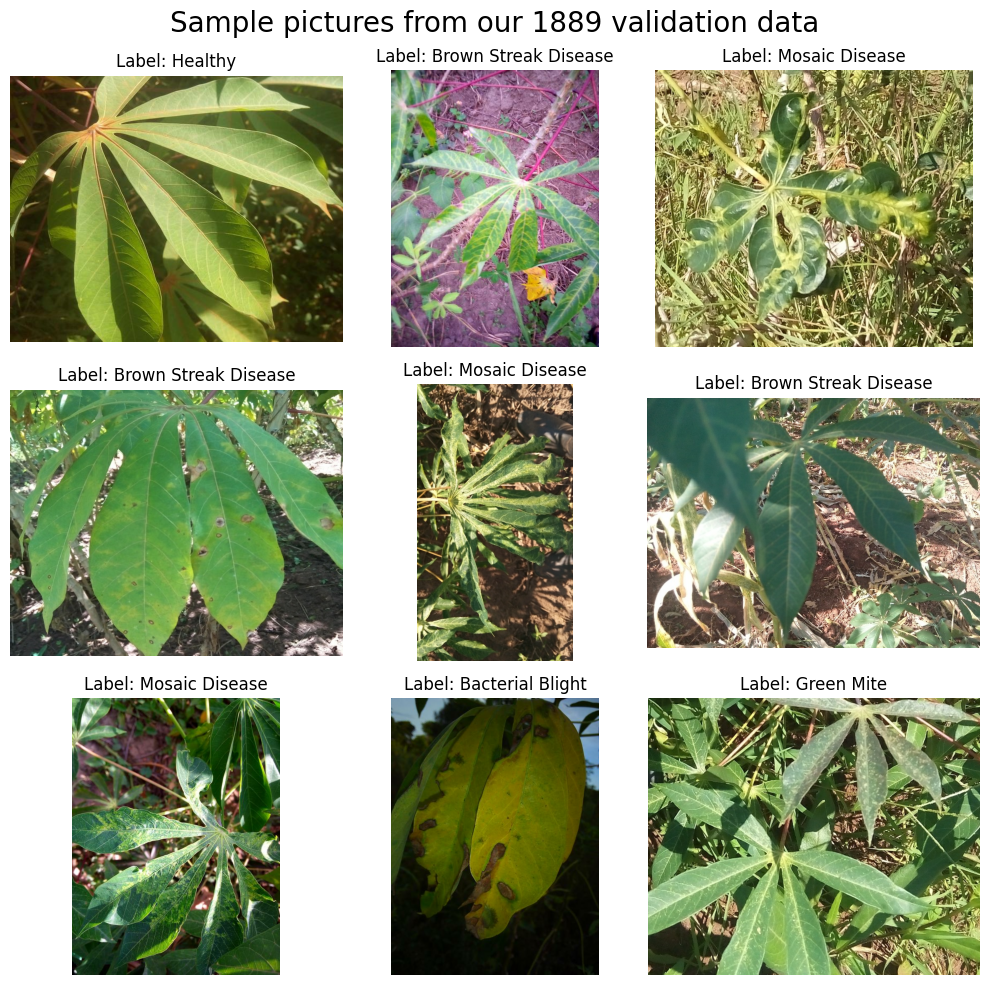

In [17]:
label_map = {
    0: 'Bacterial Blight',
    1: 'Brown Streak Disease',
    2: 'Green Mite',
    3: 'Mosaic Disease',
    4: 'Healthy',
    5: 'Unknown'
}

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, (image, label) in enumerate(val_ds.take(9)):
    image = image.numpy()
    label = label.numpy()

    row, col = divmod(i, 3)
    ax = axes[row, col]

    ax.imshow(image)
    # Use the mapping to set the title with the disease name.
    ax.set_title(f"Label: {label_map[label]}")
    ax.axis("off")

fig.suptitle(f"Sample pictures from our {ds_info.splits['validation'].num_examples} validation data", fontsize=20)
plt.tight_layout()
plt.show()

In [18]:
ds_info.splits['test'].num_examples

1885

In [19]:
#pip install --upgrade dataset-tools

In [20]:
#import dataset_tools as dtools

#dtools.download(dataset='Makerere University Cassava', dst_dir='~/dataset-ninja/')

In [21]:
print(f"Class names: {class_names}")

Class names: ['cbb', 'cbsd', 'cgm', 'cmd', 'healthy']


In [22]:
class_counts = {name: 0 for name in class_names}

In [23]:
ds_info

tfds.core.DatasetInfo(
    name='cassava',
    full_name='cassava/0.1.0',
    description="""
    Cassava consists of leaf images for the cassava plant depicting healthy and
    four (4) disease conditions; Cassava Mosaic Disease (CMD), Cassava Bacterial
    Blight (CBB), Cassava Greem Mite (CGM) and Cassava Brown Streak Disease (CBSD).
    Dataset consists of a total of 9430 labelled images.
    The 9430 labelled images are split into a training set (5656), a test set(1885)
    and a validation set (1889). The number of images per class are unbalanced with
    the two disease classes CMD and CBSD having 72% of the images.
    """,
    homepage='https://www.kaggle.com/c/cassava-disease/overview',
    data_dir='/content/drive/MyDrive/cassava/cassava/0.1.0',
    file_format=tfrecord,
    download_size=1.26 GiB,
    dataset_size=1.26 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        

In [27]:
ds_info.features['label'].names

['cbb', 'cbsd', 'cgm', 'cmd', 'healthy']

In [28]:
label_names = ds_info.features['label'].names

In [29]:
print(label_names)

['cbb', 'cbsd', 'cgm', 'cmd', 'healthy']


In [43]:
label_counter = Counter()
for _, label in train_ds:
    label_counter[int(label.numpy())] += 1

# Sort labels by count (highest to lowest)
sorted_counts = sorted(label_counter.items(), key=lambda x: x[1], reverse=True)

total_sum = sum(label_counter.values())

# Print sorted class distribution with class names
print("Class distribution in training dataset:")
for idx, count in sorted_counts:
    print(f"{label_names[idx]}: {count}")

print("\nTotal number of samples in the dataset:", total_sum)

Class distribution in training dataset:
cmd: 2658
cbsd: 1443
cgm: 773
cbb: 466
healthy: 316

Total number of samples in the dataset: 5656


In [44]:
label_counter = Counter()
for _, label in test_ds:
    label_counter[int(label.numpy())] += 1

# Sort labels by count (highest to lowest)
sorted_counts = sorted(label_counter.items(), key=lambda x: x[1], reverse=True)

total_sum = sum(label_counter.values())

# Print sorted class distribution with class names
print("Class distribution in test dataset (sorted):")
for idx, count in sorted_counts:
    print(f"{label_names[idx]}: {count}")

print("\nTotal number of samples in the dataset:", total_sum)

Class distribution in test dataset (sorted):
cmd: 886
cbsd: 481
cgm: 258
cbb: 155
healthy: 105

Total number of samples in the dataset: 1885


In [45]:
label_counter = Counter()
for _, label in val_ds:
    label_counter[int(label.numpy())] += 1

# Sort labels by count (highest to lowest)
sorted_counts = sorted(label_counter.items(), key=lambda x: x[1], reverse=True)

total_sum = sum(label_counter.values())

# Print sorted class distribution with class names
print("Class distribution in validation dataset:")
for idx, count in sorted_counts:
    print(f"{label_names[idx]}: {count}")

print("\nTotal number of samples in the dataset:", total_sum)

Class distribution in validation dataset:
cmd: 887
cbsd: 482
cgm: 258
cbb: 156
healthy: 106

Total number of samples in the dataset: 1889


In [26]:
IMG_SIZE = 300
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

In [24]:
# Augmentation pipeline for minority classes
def aggressive_augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, 0.4)
    image = tf.image.random_contrast(image, 0.5, 1.5)
    image = tf.image.random_saturation(image, 0.5, 1.5)
    image = tf.image.random_hue(image, 0.2)
    image = tf.image.random_jpeg_quality(image, 50, 100)
    image = tf.image.random_crop(image, size=[IMG_SIZE-50, IMG_SIZE-50, 3])
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    return image, label

In [25]:
# Basic augmentation for majority classes
def mild_augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, 0.2)
    return image, label

In [26]:
# Class-aware augmentation routing
def class_aware_augment(image, label):
    if label in [1, 3]:  # CBB and CBSD (minority classes)
        return aggressive_augment(image, label)
    else:
        return mild_augment(image, label)

In [27]:
# Preprocessing function
def preprocess(image, label):
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

In [28]:
# Create optimized data pipelines
def create_pipeline(dataset, augment=False):
    ds = dataset.map(preprocess, num_parallel_calls=AUTOTUNE)
    if augment:
        ds = ds.map(class_aware_augment, num_parallel_calls=AUTOTUNE)
    ds = ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)
    return ds

In [29]:
# Apply augmentations only to training data
train_ds = create_pipeline(train_ds, augment=True)
val_ds = create_pipeline(val_ds)
test_ds = create_pipeline(test_ds)

OperatorNotAllowedInGraphError: in user code:

    File "<ipython-input-26-a7325bbc78da>", line 3, in class_aware_augment  *
        if label in [1, 3]:  # CBB and CBSD (minority classes)

    OperatorNotAllowedInGraphError: Using a symbolic `tf.Tensor` as a Python `bool` is not allowed. You can attempt the following resolutions to the problem: If you are running in Graph mode, use Eager execution mode or decorate this function with @tf.function. If you are using AutoGraph, you can try decorating this function with @tf.function. If that does not work, then you may be using an unsupported feature or your source code may not be visible to AutoGraph. See https://github.com/tensorflow/tensorflow/blob/master/tensorflow/python/autograph/g3doc/reference/limitations.md#access-to-source-code for more information.


In [ ]:
# Create EfficientNetB0 base model
base_model = tf.keras.applications.EfficientNetB0(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)